In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregar os arquivos JSON
df1 = pd.read_csv('../Arquivos/dolar-2023-03-20.csv', parse_dates=['Data'])
df2 = pd.read_csv('../Arquivos/dolar-2023-03-21.csv', parse_dates=['Data'])
pd.set_option('display.max_columns', None)

In [3]:
# Definir 'Data' como índice
df1.set_index('Data', inplace=True)
df2.set_index('Data', inplace=True)

In [4]:
# Calcular a diferença entre os valores
df_diff = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_df1', '_df2'))
df_diff['diff'] = df1['Valor'] - df2['Valor']

df_diff = df_diff.sort_index()
df_diff = df_diff.fillna(0.0)

# Definir um limiar para identificar as anomalias
limite = 1

# Criar uma máscara para as diferenças acima do limite
mask = np.abs(df_diff['diff']) > limite

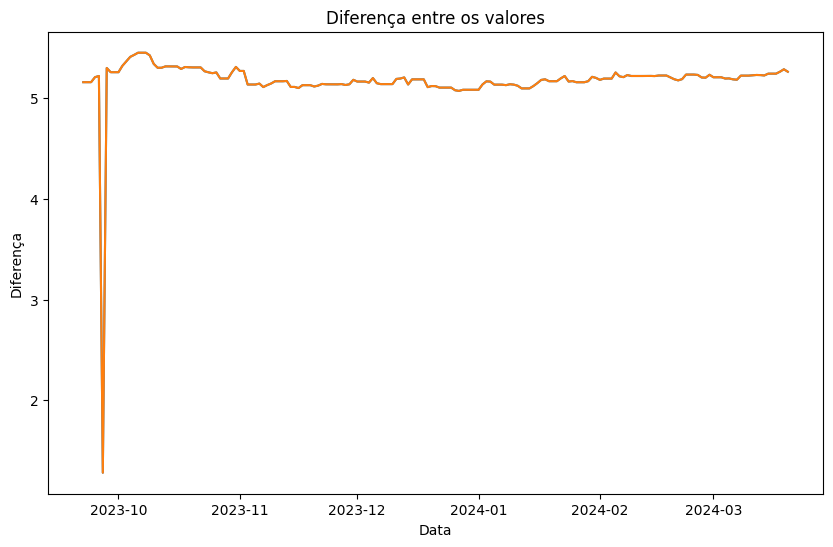

In [5]:
# Plotar a diferença
plt.figure(figsize=(10, 6))

plt.plot(df1.index, df1.values)
plt.plot(df2.index, df2.values)
plt.scatter(df_diff['diff'].index[mask], df_diff['diff'].values[mask], color='red')

plt.fill_between(df_diff.index, df_diff['Valor_df1'], df_diff['Valor_df2'], where=mask, color='red', alpha=0.5, label='Diferença')

plt.title('Diferença entre os valores')
plt.xlabel('Data')
plt.ylabel('Diferença')
plt.show()
